In [1]:
%matplotlib inline
import six.moves.cPickle as pickle
import numpy as np
import matplotlib.pyplot as plt


/home/sebastianschlecht/anaconda2/envs/deep/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [62]:
def collect_losses(files, type):
    l = []
    for f in files:
        p = pickle.load(open(f, "rb"))
        ls = np.array([s["loss"] for s in p[type]])
        l.append(ls)
    return np.concatenate(l)

Total number of train iters: 129600
Total number of val iters: 259
Train Loss (RED) (smoothed over 1000 iterations)
Validation Loss (BLUE) (smoothed over 2 iterations)


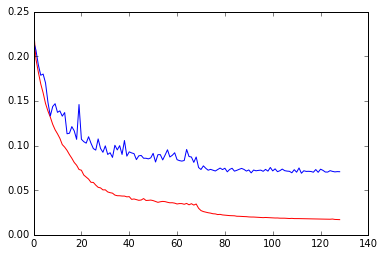

In [157]:

dump_files = [
             '/media/data/depth_models/vnet2_logloss_tmp_loss.pkl',
             '/media/data/depth_models/vnet2_logloss_step_1_tmp_loss.pkl']
losses = collect_losses(dump_files,"train")
# Epoch-wise mean
N = 1000
print "Total number of train iters: %i" % len(losses)
if len(losses) < 2*N:
    print "Warning: Less than two epochs of training."
nn  = np.zeros((len(losses) // N))
for x in range(len(losses) // N):
    nn[x] = losses[x*N:(x+1)*N].mean()
    
losses = collect_losses(dump_files,"val")
# Epoch-wise mean
X = 2
print "Total number of val iters: %i" % len(losses)
if len(losses) < 2*X:
    print "Warning: Less than two epochs of training."
nl  = np.zeros((len(losses) // X))
for x in range(len(losses) // X):
    nl[x] = losses[x*X:(x+1)*X].mean()
    
print "Train Loss (RED) (smoothed over %i iterations)" % N
print "Validation Loss (BLUE) (smoothed over %i iterations)" % X
x1 = np.arange(len(nn))
x2 = np.arange(len(nl))
plt.plot(x1, nn,'r-',x2, nl, 'b-')
plt.show()



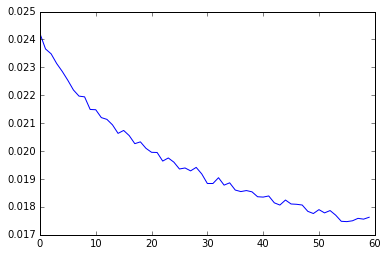

In [151]:
plt.plot(nn[90:])


In [129]:
import h5py, numpy as np
f = h5py.File("/media/data/depth_data/nyu_depth_combined_vnet2.hdf5")
b = int(f["images"].shape[0] * 0.9)
images = np.array(f["images"][b:])
depths = np.array(f["depths"][b:])
print images.shape
mean = np.load("/media/data/depth_data/nyu_depth_combined_vnet2.npy")

(374, 3, 258, 344)


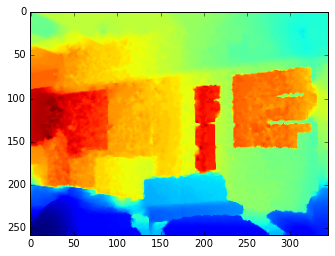

In [138]:
sample = depths[4]

plt.imshow(sample)
plt.show()
